# MNIST 기본 예제

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.2683 - acc: 0.9150 - val_loss: 0.0556 - val_acc: 0.9825
Epoch 2/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0861 - acc: 0.9745 - val_loss: 0.0391 - val_acc: 0.9864
Epoch 3/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0647 - acc: 0.9804 - val_loss: 0.0367 - val_acc: 0.9885
Epoch 4/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0521 - acc: 0.9847 - val_loss: 0.0282 - val_acc: 0.9906
Epoch 5/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0456 - acc: 0.9869 - val_loss: 0.0321 - val_acc: 0.9892
Epoch 6/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0431 - acc: 0.9872 - val_loss: 0.0298 - val_acc: 0.9902
Epoch 7/12
60000/60000 [==============================

# MNIST 예제2

In [2]:
##### 간단한 케라스 예제


# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

# 5. 학습과정 살펴보기
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['acc'])

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

Epoch 1/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.6749 - acc: 0.8258
Epoch 2/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.3456 - acc: 0.9027
Epoch 3/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.2981 - acc: 0.9151
Epoch 4/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.2683 - acc: 0.9241
Epoch 5/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.2453 - acc: 0.9308
## training loss and acc ##
[0.6748577527125676, 0.34556459083954494, 0.2980758161187172, 0.26834829997022946, 0.24528230833212536]
[0.8257833333333333, 0.9027, 0.9151333333333334, 0.9240833333333334, 0.9308166666666666]
10000/10000 [==============================] - 0s 28us/step
## evaluation loss and_metrics ##
[0.2307247411057353, 0.9355]
## yhat ##
[[2.2712215e-04 2.7560372e-07 2.8355527e-04 1.5360008e-03 2.6331909e-06
  3.9809456e-05 9.1548202e-08 9.9704581e-01 5.2552539e-05 8.1214687e-04]]


# matplot 예제

Using TensorFlow backend.


11501568/11490434 [==============================] - 16s 1us/step
Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 1s 2ms/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/1000
700/700 [==============================] - 0s 200us/step - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/1000
700/700 [==============================] - 0s 186us/step - loss: 2.1730 - acc: 0.1729 - val_loss: 2.1631 - val_acc: 0.1867
Epoch 4/1000
700/700 [==============================] - 0s 184us/step - loss: 2.1441 - acc: 0.1786 - val_loss: 2.1372 - val_acc: 0.1867
Epoch 5/1000
700/700 [==============================] - 0s 189us/step - loss: 2.1177 - acc: 0.1900 - val_loss: 2.1141 - val_acc: 0.1867
Epoch 6/1000
700/700 [==============================] - 0s 188us/step - loss: 2.0940 - acc: 0.2029 - val_loss: 2.0931 - val_acc: 0.2033
Epoch 7/1000
700/700 [==============================] - 0s 197us/step - lo

700/700 [==============================] - 0s 202us/step - loss: 1.7590 - acc: 0.2671 - val_loss: 1.8329 - val_acc: 0.2233
Epoch 60/1000
700/700 [==============================] - 0s 190us/step - loss: 1.7552 - acc: 0.2614 - val_loss: 1.8256 - val_acc: 0.2500
Epoch 61/1000
700/700 [==============================] - 0s 190us/step - loss: 1.7566 - acc: 0.2814 - val_loss: 1.8336 - val_acc: 0.2400
Epoch 62/1000
700/700 [==============================] - 0s 184us/step - loss: 1.7531 - acc: 0.2729 - val_loss: 1.8312 - val_acc: 0.2267
Epoch 63/1000
700/700 [==============================] - 0s 184us/step - loss: 1.7505 - acc: 0.2857 - val_loss: 1.8299 - val_acc: 0.2000
Epoch 64/1000
700/700 [==============================] - 0s 195us/step - loss: 1.7484 - acc: 0.2800 - val_loss: 1.8268 - val_acc: 0.2200
Epoch 65/1000
700/700 [==============================] - 0s 192us/step - loss: 1.7457 - acc: 0.2814 - val_loss: 1.8298 - val_acc: 0.2033
Epoch 66/1000
700/700 [==============================] 

Epoch 119/1000
700/700 [==============================] - 0s 200us/step - loss: 1.6670 - acc: 0.3257 - val_loss: 1.8216 - val_acc: 0.2200
Epoch 120/1000
700/700 [==============================] - 0s 188us/step - loss: 1.6661 - acc: 0.3129 - val_loss: 1.8219 - val_acc: 0.2200
Epoch 121/1000
700/700 [==============================] - 0s 218us/step - loss: 1.6646 - acc: 0.3071 - val_loss: 1.8132 - val_acc: 0.2233
Epoch 122/1000
700/700 [==============================] - 0s 198us/step - loss: 1.6637 - acc: 0.3229 - val_loss: 1.8194 - val_acc: 0.2200
Epoch 123/1000
700/700 [==============================] - 0s 210us/step - loss: 1.6629 - acc: 0.3100 - val_loss: 1.8139 - val_acc: 0.2200
Epoch 124/1000
700/700 [==============================] - 0s 184us/step - loss: 1.6619 - acc: 0.3143 - val_loss: 1.8187 - val_acc: 0.2267
Epoch 125/1000
700/700 [==============================] - 0s 197us/step - loss: 1.6606 - acc: 0.3257 - val_loss: 1.8212 - val_acc: 0.2333
Epoch 126/1000
700/700 [==========

700/700 [==============================] - 0s 206us/step - loss: 1.5770 - acc: 0.3429 - val_loss: 1.8718 - val_acc: 0.2300
Epoch 238/1000
700/700 [==============================] - 0s 184us/step - loss: 1.5774 - acc: 0.3471 - val_loss: 1.8613 - val_acc: 0.2200
Epoch 239/1000
700/700 [==============================] - 0s 184us/step - loss: 1.5770 - acc: 0.3571 - val_loss: 1.8682 - val_acc: 0.2267
Epoch 240/1000
700/700 [==============================] - 0s 198us/step - loss: 1.5749 - acc: 0.3571 - val_loss: 1.8719 - val_acc: 0.2500
Epoch 241/1000
700/700 [==============================] - 0s 202us/step - loss: 1.5749 - acc: 0.3571 - val_loss: 1.8738 - val_acc: 0.2433
Epoch 242/1000
700/700 [==============================] - 0s 224us/step - loss: 1.5743 - acc: 0.3514 - val_loss: 1.8733 - val_acc: 0.2100
Epoch 243/1000
700/700 [==============================] - 0s 191us/step - loss: 1.5743 - acc: 0.3629 - val_loss: 1.8806 - val_acc: 0.2200
Epoch 244/1000
700/700 [=========================

700/700 [==============================] - 0s 191us/step - loss: 1.5261 - acc: 0.3600 - val_loss: 1.9553 - val_acc: 0.2267
Epoch 356/1000
700/700 [==============================] - 0s 199us/step - loss: 1.5260 - acc: 0.3700 - val_loss: 1.9442 - val_acc: 0.2433
Epoch 357/1000
700/700 [==============================] - 0s 208us/step - loss: 1.5259 - acc: 0.3743 - val_loss: 1.9355 - val_acc: 0.2267
Epoch 358/1000
700/700 [==============================] - 0s 189us/step - loss: 1.5251 - acc: 0.3729 - val_loss: 1.9494 - val_acc: 0.2233
Epoch 359/1000
700/700 [==============================] - 0s 199us/step - loss: 1.5251 - acc: 0.3729 - val_loss: 1.9450 - val_acc: 0.2133
Epoch 360/1000
700/700 [==============================] - 0s 192us/step - loss: 1.5232 - acc: 0.3743 - val_loss: 1.9454 - val_acc: 0.2233
Epoch 361/1000
700/700 [==============================] - 0s 188us/step - loss: 1.5232 - acc: 0.3686 - val_loss: 1.9485 - val_acc: 0.2300
Epoch 362/1000
700/700 [=========================

700/700 [==============================] - 0s 186us/step - loss: 1.4850 - acc: 0.3914 - val_loss: 2.0121 - val_acc: 0.2367
Epoch 474/1000
700/700 [==============================] - 0s 193us/step - loss: 1.4838 - acc: 0.3900 - val_loss: 1.9976 - val_acc: 0.2267
Epoch 475/1000
700/700 [==============================] - 0s 181us/step - loss: 1.4842 - acc: 0.3900 - val_loss: 2.0047 - val_acc: 0.2233
Epoch 476/1000
700/700 [==============================] - 0s 205us/step - loss: 1.4835 - acc: 0.3900 - val_loss: 2.0056 - val_acc: 0.2267
Epoch 477/1000
700/700 [==============================] - 0s 196us/step - loss: 1.4839 - acc: 0.3900 - val_loss: 2.0095 - val_acc: 0.2267
Epoch 478/1000
700/700 [==============================] - 0s 201us/step - loss: 1.4838 - acc: 0.3929 - val_loss: 2.0056 - val_acc: 0.2333
Epoch 479/1000
700/700 [==============================] - 0s 184us/step - loss: 1.4833 - acc: 0.3900 - val_loss: 2.0015 - val_acc: 0.2300
Epoch 480/1000
700/700 [=========================

700/700 [==============================] - 0s 200us/step - loss: 1.4554 - acc: 0.4086 - val_loss: 2.0605 - val_acc: 0.2267
Epoch 592/1000
700/700 [==============================] - 0s 217us/step - loss: 1.4544 - acc: 0.4086 - val_loss: 2.0557 - val_acc: 0.2333
Epoch 593/1000
700/700 [==============================] - 0s 192us/step - loss: 1.4546 - acc: 0.4057 - val_loss: 2.0498 - val_acc: 0.2267
Epoch 594/1000
700/700 [==============================] - 0s 191us/step - loss: 1.4540 - acc: 0.4129 - val_loss: 2.0513 - val_acc: 0.2333
Epoch 595/1000
700/700 [==============================] - 0s 192us/step - loss: 1.4543 - acc: 0.4057 - val_loss: 2.0569 - val_acc: 0.2433
Epoch 596/1000
700/700 [==============================] - 0s 212us/step - loss: 1.4537 - acc: 0.4129 - val_loss: 2.0472 - val_acc: 0.2300
Epoch 597/1000
700/700 [==============================] - 0s 184us/step - loss: 1.4525 - acc: 0.4143 - val_loss: 2.0491 - val_acc: 0.2500
Epoch 598/1000
700/700 [=========================

700/700 [==============================] - 0s 185us/step - loss: 1.4296 - acc: 0.4186 - val_loss: 2.1160 - val_acc: 0.2533
Epoch 710/1000
700/700 [==============================] - 0s 192us/step - loss: 1.4314 - acc: 0.4229 - val_loss: 2.0957 - val_acc: 0.2467
Epoch 711/1000
700/700 [==============================] - 0s 218us/step - loss: 1.4304 - acc: 0.4186 - val_loss: 2.0964 - val_acc: 0.2367
Epoch 712/1000
700/700 [==============================] - 0s 198us/step - loss: 1.4300 - acc: 0.4214 - val_loss: 2.1035 - val_acc: 0.2567
Epoch 713/1000
700/700 [==============================] - 0s 191us/step - loss: 1.4310 - acc: 0.4186 - val_loss: 2.0861 - val_acc: 0.2400
Epoch 714/1000
700/700 [==============================] - 0s 182us/step - loss: 1.4305 - acc: 0.4243 - val_loss: 2.0996 - val_acc: 0.2367
Epoch 715/1000
700/700 [==============================] - 0s 199us/step - loss: 1.4282 - acc: 0.4243 - val_loss: 2.0936 - val_acc: 0.2600
Epoch 716/1000
700/700 [=========================

700/700 [==============================] - 0s 186us/step - loss: 1.4112 - acc: 0.4300 - val_loss: 2.1481 - val_acc: 0.2400
Epoch 828/1000
700/700 [==============================] - 0s 195us/step - loss: 1.4118 - acc: 0.4343 - val_loss: 2.1369 - val_acc: 0.2367
Epoch 829/1000
700/700 [==============================] - 0s 192us/step - loss: 1.4111 - acc: 0.4314 - val_loss: 2.1411 - val_acc: 0.2433
Epoch 830/1000
700/700 [==============================] - 0s 219us/step - loss: 1.4104 - acc: 0.4271 - val_loss: 2.1457 - val_acc: 0.2400
Epoch 831/1000
700/700 [==============================] - 0s 190us/step - loss: 1.4105 - acc: 0.4443 - val_loss: 2.1591 - val_acc: 0.2467
Epoch 832/1000
700/700 [==============================] - 0s 183us/step - loss: 1.4111 - acc: 0.4343 - val_loss: 2.1598 - val_acc: 0.2500
Epoch 833/1000
700/700 [==============================] - 0s 186us/step - loss: 1.4110 - acc: 0.4243 - val_loss: 2.1645 - val_acc: 0.2467
Epoch 834/1000
700/700 [=========================

700/700 [==============================] - 0s 182us/step - loss: 1.3947 - acc: 0.4329 - val_loss: 2.1898 - val_acc: 0.2500
Epoch 946/1000
700/700 [==============================] - 0s 185us/step - loss: 1.3945 - acc: 0.4329 - val_loss: 2.1833 - val_acc: 0.2467
Epoch 947/1000
700/700 [==============================] - 0s 187us/step - loss: 1.3939 - acc: 0.4414 - val_loss: 2.1935 - val_acc: 0.2533
Epoch 948/1000
700/700 [==============================] - 0s 194us/step - loss: 1.3940 - acc: 0.4300 - val_loss: 2.1744 - val_acc: 0.2367
Epoch 949/1000
700/700 [==============================] - 0s 184us/step - loss: 1.3938 - acc: 0.4471 - val_loss: 2.1834 - val_acc: 0.2400
Epoch 950/1000
700/700 [==============================] - 0s 200us/step - loss: 1.3929 - acc: 0.4386 - val_loss: 2.1845 - val_acc: 0.2367
Epoch 951/1000
700/700 [==============================] - 0s 201us/step - loss: 1.3940 - acc: 0.4429 - val_loss: 2.1889 - val_acc: 0.2500
Epoch 952/1000
700/700 [=========================

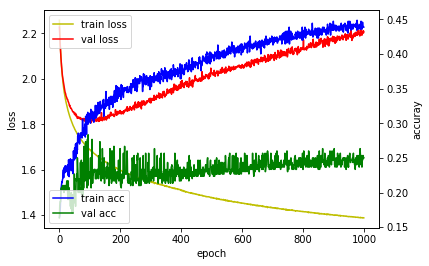

In [1]:
## matplot example

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val))

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# Tensorboard 예제

In [ ]:
### tensorboard

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
tb_hist = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)
model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[tb_hist])

# ROC Curve 예제

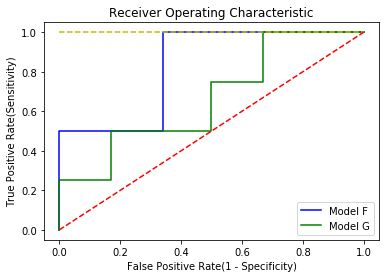

In [2]:
## ROC Curve

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

sens_F = np.array([1.0,  1.0, 1.0,  1.0, 0.75,  0.5,  0.5, 0.5, 0.5, 0.5, 0.0])
spec_F = np.array([0.0, 0.16, 0.5, 0.66, 0.66, 0.66, 0.83, 1.0, 1.0, 1.0, 1.0])

sens_G = np.array([1.0,  1.0, 0.75, 0.75, 0.5,  0.5,  0.5,  0.5, 0.25, 0.25, 0.0])
spec_G = np.array([0.0, 0.33, 0.33,  0.5, 0.5, 0.66, 0.66, 0.83, 0.83,  1.0, 1.0])

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(1-spec_F, sens_F, 'b', label = 'Model F')   
plt.plot(1-spec_G, sens_G, 'g', label = 'Model G') 
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

# ROC Curve 예제2

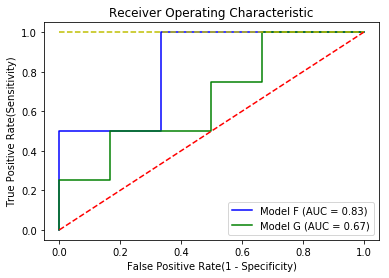

In [3]:
# ROC Curve 2

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

class_F = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])
proba_F = np.array([0.05, 0.15, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.95, 0.95])

class_G = np.array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1])
proba_G = np.array([0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.65, 0.75, 0.85, 0.95])

false_positive_rate_F, true_positive_rate_F, thresholds_F = roc_curve(class_F, proba_F)
false_positive_rate_G, true_positive_rate_G, thresholds_G = roc_curve(class_G, proba_G)
roc_auc_F = auc(false_positive_rate_F, true_positive_rate_F)
roc_auc_G = auc(false_positive_rate_G, true_positive_rate_G)

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')


plt.plot(false_positive_rate_F, true_positive_rate_F, 'b', label='Model F (AUC = %0.2f)'% roc_auc_F)
plt.plot(false_positive_rate_G, true_positive_rate_G, 'g', label='Model G (AUC = %0.2f)'% roc_auc_G)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

# Precision-Recall Graph 예제

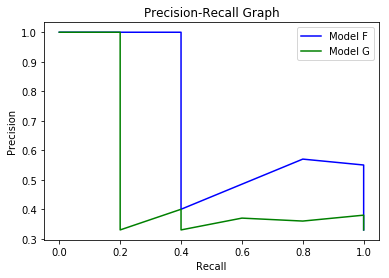

In [4]:
#Precision-Recall Graph

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

precision_F = np.array([0.33, 0.38, 0.45, 0.55, 0.57, 0.40, 0.66, 1.0, 1.0, 1.0, 1.0])
recall_F = np.array([1.0, 1.0, 1.0, 1.0, 0.8, 0.4, 0.4, 0.4, 0.4, 0.2, 0.0])

precision_G = np.array([0.33, 0.38, 0.36, 0.37, 0.33, 0.40, 0.33, 0.5, 1.0, 1.0, 1.0])
recall_G = np.array([1.0, 1.0, 0.8, 0.6, 0.4, 0.4, 0.2, 0.2, 0.2, 0.2, 0.0])

plt.title('Precision-Recall Graph')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.plot(recall_F, precision_F, 'b', label = 'Model F')   
plt.plot(recall_G, precision_G, 'g', label = 'Model G') 

plt.legend(loc='upper right')
plt.show()

# AP(Average Precision) 예제

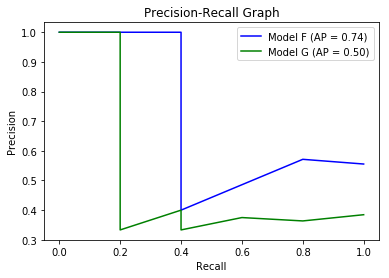

In [5]:
#AP(Average Precision)

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

class_F = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])
proba_F = np.array([0.05, 0.05, 0.15, 0.15, 0.25, 0.25, 0.35, 0.35, 0.45, 0.45, 0.55, 0.55, 0.65, 0.85, 0.95])

class_G = np.array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])
proba_G = np.array([0.05, 0.05, 0.15, 0.15, 0.25, 0.25, 0.25, 0.35, 0.35, 0.45, 0.55, 0.55, 0.65, 0.75, 0.95])

precision_F, recall_F, _ = precision_recall_curve(class_F, proba_F)
precision_G, recall_G, _ = precision_recall_curve(class_G, proba_G)

ap_F = average_precision_score(class_F, proba_F)
ap_G = average_precision_score(class_G, proba_G)

plt.title('Precision-Recall Graph')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.plot(recall_F, precision_F, 'b', label = 'Model F (AP = %0.2F)'%ap_F)   
plt.plot(recall_G, precision_G, 'g', label = 'Model G (AP = %0.2F)'%ap_G)  

plt.legend(loc='upper right')
plt.show()